# Loading  libraries

In [1]:
import numpy as np
import array
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate
from matplotlib import colors as mcolors
from __future__ import division
colors = ["black","cyan","darkmagenta","orange","red","blue","darkred","khaki","brown","pink"]


# Making the initial conditions

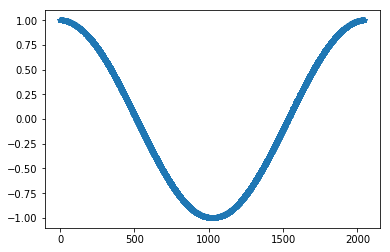

('Should be 0 for the symmetric case: ', 0.0)
('The second derivative at minimum is:', 1.4118526975082091e-05)
('The second analytical derivative at minimum is:', 3.764955292163604e-05)


In [21]:
n_grid = 2**11 # size of data array, number of points for the IC in 1D
# phi0 = 1.e-4
# myseed = 444
# binfac = 4**5
# f5=open('./real_pi.txt', 'w')
# np.random.seed(seed=myseed)
# Ma
phism=np.zeros(n_grid) # phism is going to be phi in comsology and is made either as a random noise or a given function for the study
# sigma=np.sqrt(sigmax2)
for i in range( int((n_grid+1)/2) ):
#     if i<=(nx-1)/2:
    phism[i]=1.0*np.cos(np.pi*2.0*i/n_grid) # taking phi initially as cosine function for half od the data
#     phism[i]=((i-(n_grid/2))/n_grid)**2  # taking phi initially as cosine function for half od the data
    phism[n_grid-1-i]=phism[i] # the other half are made in a way that to make the data symmetric.
        
# np.savetxt("real_phi.txt",phism)
spec = np.abs(np.fft.fft(phism))**2 # computing the spectrum which is absolute value of Forier transformation
freqs = np.fft.fftfreq(len(phism)) # discrete frequencies associated to the length of the field

# pi  = phism # In case we want to set at the initial time pi = phi otherwise it is set by the PDE, like in the 3D case. 
# phism = 1.e-5 * (phism);
plt.plot(phism,"*")
plt.show()
#Making sure that the made data is symmetric
for i in range(n_grid):
    ss=+phism[n_grid-i-1]-phism[i]
print("Should be 0 for the symmetric case: ", ss) # Has to be 0 otherwise the data is not symmetric
phism[0]
dx=1
print("The second derivative at minimum is:",np.max((np.roll(phism,1)+np.roll(phism,-1)-2.0*phism)/dx**2))
print("The second analytical derivative at minimum is:",np.pi**2*16/(n_grid**2))




In [27]:
###########################
##### Initial conditions:##
###########################
pi   = np.zeros(n_grid)
zeta = np.zeros(n_grid)
#IC
# del cs2;
# pi_prime  = phism This is indeed the IC but the PDE itself assign it.
psism = phism;
w = -0.9;
cs2 = 0.;
###########################
##### Parameters for kessence:##
###########################
tauin = 0.0001;
dt    = 0.008# cs2 = 50 #1.e-3
dx  = 1.
tauend = 77.0 #100.0
tauwrite=(tauend-tauin)/120.
tau = tauin

###########################
##### simulation 1+1 D##
###########################

list_tau_pi=[]
list_zeta=[]
list_pi_prime=[]
list_tau=[]
list_pi_ddot=[]
list_dpi_dx=[]

phiplus  = np.roll(phism,1)
phiminus = np.roll(phism,-1)
piplus  = np.roll(pi,1);
pi_prime =phism;
zeta = phism
list_d2pi_dx2=[]

A = 0.0;
B=1
while (tau < tauend and np.abs(np.max(piplus))<1.e6 ):
    ########################
    piplus  = np.roll(pi,1)
    pi_2_plus  = np.roll(pi,2)
    piminus = np.roll(pi,-1)
    pi_2minus = np.roll(pi,-2)
    ######3##
    zetaplus  = np.roll(zeta,1)
    zetaminus = np.roll(zeta,-1)

    tau = tau + dt
#     H = 2/tau;
#     H_prime = -2/(tau*tau);
#     Phi_prime = 0;
#     laplacepi = ((-pi_2_plus + 16*piplus -30.0*pi + 16*piminus-pi_2minus)/(12.0*dx**2));
    laplacepi = ((-pi_2_plus + 16*piplus -30.0*pi + 16*piminus-pi_2minus)/(12.0*dx**2));

#     linear_term = 3*w*H*zeta - 3*cs2*(H**2*pi-H*psism-H_prime*pi-Phi_prime)+ cs2*laplacepi;
    ############# NL terms and definitions #########
    Gradzeta_Gradpi = ((piplus-piminus)/(2.0*dx)) * ((zetaminus-zetaminus)/(2.0*dx));
    gradpi_squared = ((piplus-piminus)/(2.0*dx))**2;
    gradzeta_squared = ((zetaminus-zetaminus)/(2.0*dx))**2;
    Gradphi_Gradpi = ((piplus-piminus)/(2.0*dx)) * ((phiplus-phiminus)/(2.0*dx));
    grad_gradpi_gradpi_squared = 3.0 * gradpi_squared**2 * laplacepi; # 3.0 gradpi^2 * laplacepi
    #################################
#     NL_term1 =  - 2.0*(cs2-1)*Gradzeta_Gradpi - (cs2 -1)*Gradphi_Gradpi;
#     NL_term2 = - ((cs2 -1) * zeta) * laplacepi; # phi-psi =0
#     NL_term3 = - (H/2.)*((2+3*w+cs2)*gradpi_squared + 6.0 *cs2*(1+w)*pi*laplacepi )
#     NL_term4 = ((cs2 -1)/2.) * grad_gradpi_gradpi_squared;
#     our_term = gradpi_squared
    zeta_prime =  +A * gradpi_squared + B * laplacepi;  #+our_term  #NL_term4 #gradpi_squared + ((cs2 -1)/2.) * grad_gradpi_gradpi_squared #gradpi_squared#+ 10. * ((cs2 -1)/2.) * grad_gradpi_gradpi_squared;# zeta' is pi_v'

    zeta = zeta + dt*(zeta_prime); # pi_v
    
    pi_prime_nm1 =pi_prime ; # pi'
    pi_prime =zeta ; # pi'
    pi  = pi+dt*(pi_prime) # pi
    
    ######
    pi_ddot =  (pi_prime - pi_prime_nm1)/dt;
#     p_dprime=(piplus+piminus-2.0*pi)/dx**2;      
    if (np.abs(np.int(tau/tauwrite)-tau/tauwrite)<dt/tauwrite):
        list_tau_pi.append(pi)
        list_pi_prime.append(pi_prime)
        list_zeta.append(zeta)
        list_tau.append(tau)
        list_pi_ddot.append(pi_ddot)
        #### Spatil derivatives
        list_dpi_dx.append((piplus-piminus)/(2.0*dx))
        list_d2pi_dx2.append(laplacepi)
        
        print('piplus',piplus[0],"    tau:",tau)


('piplus', 0.6399998059344536, '    tau:', 0.6481000000000005)
('piplus', 1.2799983252962619, '    tau:', 1.288100000000001)
('piplus', 1.919993783640696, '    tau:', 1.9281000000000015)
('piplus', 2.559983853765885, '    tau:', 2.568100000000002)
('piplus', 3.2079656850567226, '    tau:', 3.2161000000000026)
('piplus', 3.8479371936463855, '    tau:', 3.856100000000003)
('piplus', 4.487895795715116, '    tau:', 4.496100000000004)
('piplus', 5.1278390540402539, '    tau:', 5.136100000000004)
('piplus', 5.7677644731492084, '    tau:', 5.776100000000005)
('piplus', 6.4156682367986972, '    tau:', 6.4241000000000055)
('piplus', 7.0555502451560095, '    tau:', 7.064100000000006)
('piplus', 7.6954069949215498, '    tau:', 7.704100000000007)
('piplus', 8.3352360096044507, '    tau:', 8.344099999999969)
('piplus', 8.9750348060194156, '    tau:', 8.984099999999899)
('piplus', 9.6227977817593544, '    tau:', 9.632099999999827)
('piplus', 10.262528311046212, '    tau:', 10.272099999999757)
('pipl

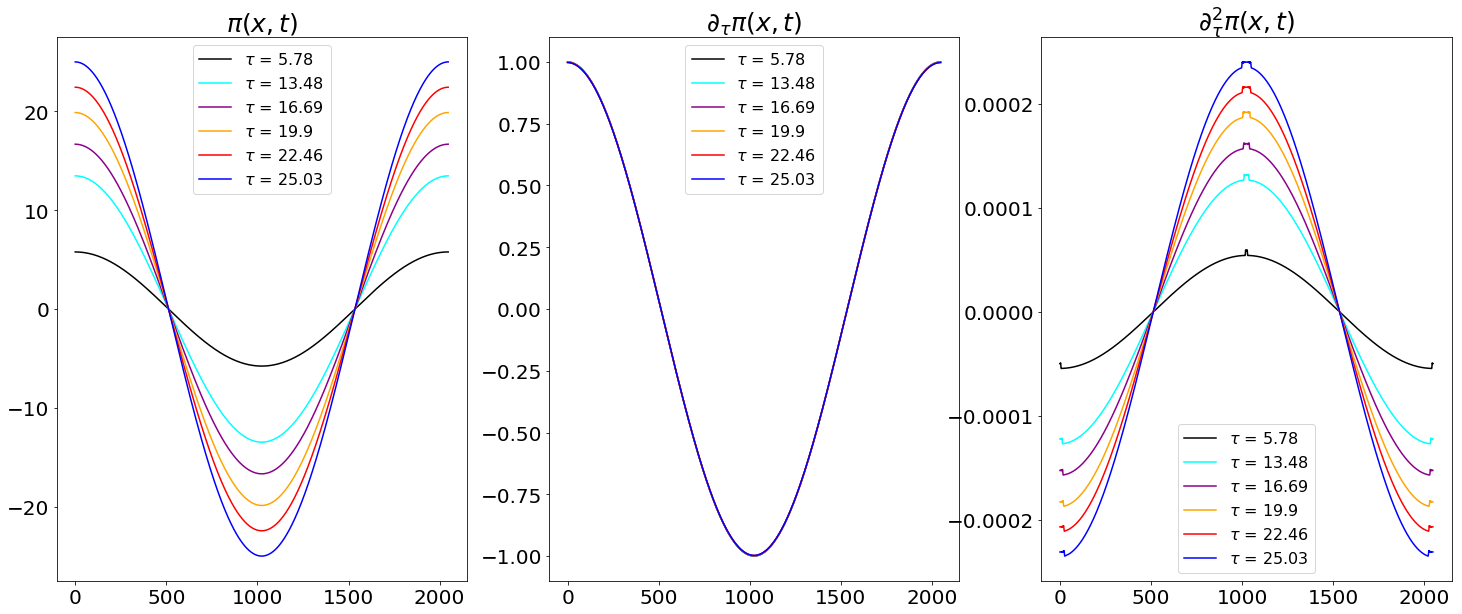

In [28]:
# %matplotlib notebook
# from matplotlib import animation
# import matplotlib.animation

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
ims  = []
numbers= np.shape(list_tau)[0]
l=0
a1=[0,1,2,3,4,5]
a2=[0,1,2,3,4,5,6,7,8,9]
a3=[8,20,25,30,34,38]
for i in a3:
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.subplot(1,3,1)
    im1, = plt.plot(list_tau_pi[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))

    plt.tick_params(labelsize=20)
    plt.title("$\pi(x,t)$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.subplot(1,3,2)
    im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)
    plt.legend(fontsize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{\tau}\pi(x,t)$",fontsize=25)
    #########
    plt.subplot(1,3,3)
    im3, =plt.plot(list_pi_ddot[i][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(list_tau[i],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial^2_{\tau}\pi(x,t)$",fontsize=25)

    ims.append([im1,im2,im3])
#     plt.plot(x,(np.abs((x-1024)*np.pi/1024)**(4/3)),label=r"t =  "+str(i*1))
#     plt.text(0,0,'dt = 5.e-4\ndx=1/512 ',family='serif',fontsize="14" )
    
#     plt.xlim(1024-40,1024+40)
# ani = animation.ArtistAnimation(fig, ims, interval=900, blit=True,repeat_delay=1000)
    plt.legend(fontsize=16)
    l=l+1;
# plt.savefig('time_derivatives.pdf')
plt.show()
# ani.save('fields_1DBlowup.mp4',dpi=400)

NameError: name 'odeint' is not defined

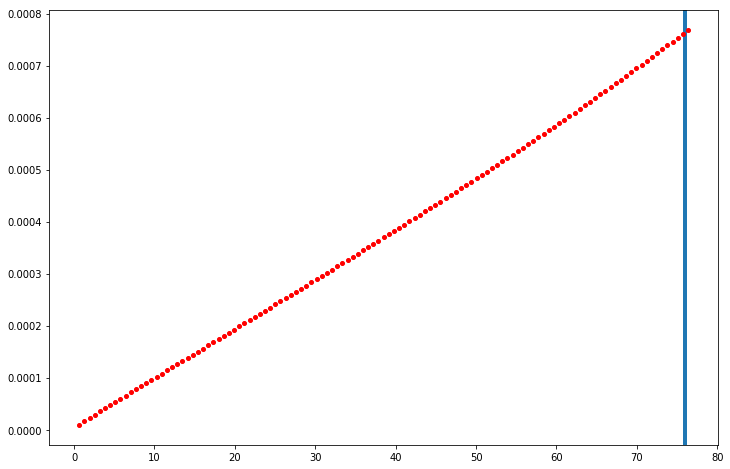

In [26]:
data=np.zeros((np.shape(list_tau[:])[0],2))
for i in range(np.shape(list_tau[:])[0]):
    data[i,0] = list_tau[i]
#     data[i,1] = np.max(list_d2pi_dx2[i][:])
    data[i,1] = np.max(list_d2pi_dx2[i][:])

fig = plt.figure(figsize=(12,8))
# a3=[0,2,4,6,8,10,12]

plt.axvline(x= 76.0202,linewidth=4,label=r"$\tau_b = 76.0202$" )
k0 = np.max((np.roll(phism,1)+np.roll(phism,-1)-2.0*phism)/dx**2)/2; #  curvature
plt.plot(data[:-1,0],data[:-1,1],"r.",markersize=8,label="PDE solution at minimum")

# plt.axvline(x= np.max(data[:,0]),color="red",markersize=16,label="Theoretical blow-up time" )


#### The ODE
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
z0 = [0.0,k0]
# time points
t = np.linspace(0.0,77)
z_peter = odeint(model_peter,z0,t)
plt.plot(t,z_peter[:,0]*2,'b.',markersize=8,label=r'ODE solution')

# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =a^2-4 a^3$')
# plt.axvline(x= 2.80433 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )


##### Graph settings
plt.yscale('log')
# plt.xscale('log')

plt.xlim(1.e-5,80)
plt.ylim(2.e-5,1.e4)
plt.tick_params(labelsize=20)
plt.ylabel("${\partial_x^2\pi(x,t)}/{\partial x^2}|_{x_{min}}$",fontsize=25)
plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
plt.xlabel(r"$\tau$",fontsize=22)
plt.legend(fontsize=16)
plt.savefig('curvature_evolution.pdf')

In [854]:
# x= 2.8043265610979877 *(k0**2 *3./8.)**(1./3.) /(np.abs(k0))
np.max(data[:,0])

77.000100000000842

In [516]:
k0

1.8778650094211646e-05

In [517]:
(data[0,1])

7.5114600376846585e-05

In [489]:
data[0,1]

7.5128361357257312e-05

# ODE solution

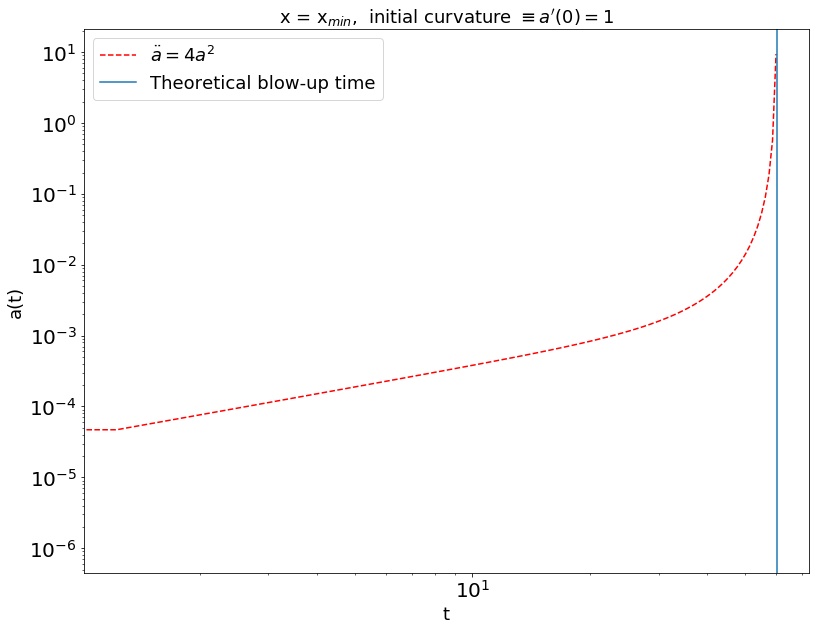

In [589]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

def model_lin_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 1*v*a;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0.000001,3.7461536709378539e-05]

# time points
t = np.linspace(0,60)
t2 = np.linspace(0,0.5)
# solve ODE
# z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)
# test = odeint(model_lin_higher,z0,t)

# plot results
# plt.plot(t2,(test[:,0]),'b-',label=r'$\ddot{a} =-4 a^3$')
plt.loglog(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')

# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =1$",fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


In [584]:
2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1]))

60.43748240974778

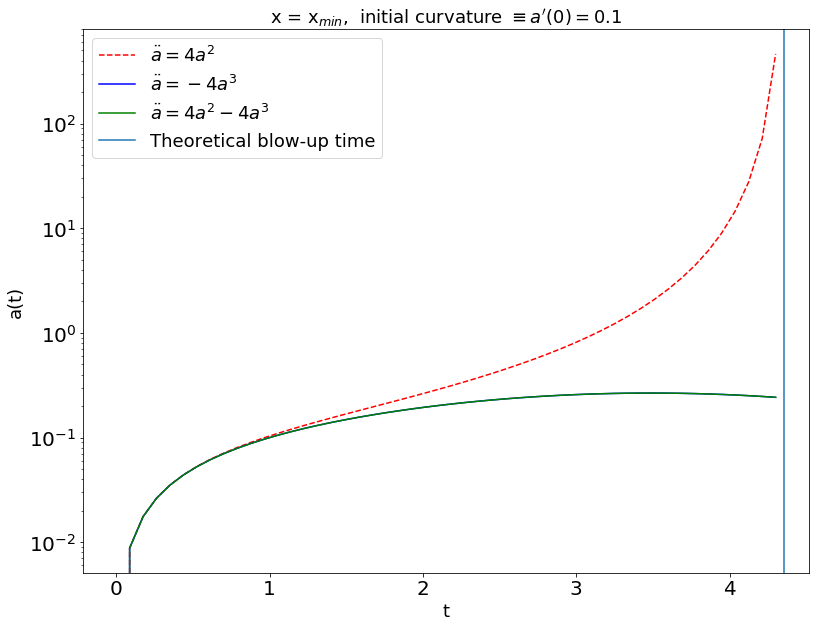

In [575]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,0.1]

# time points
t = np.linspace(0,4.3)
t2 = np.linspace(0,4.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# ODE for the maxima

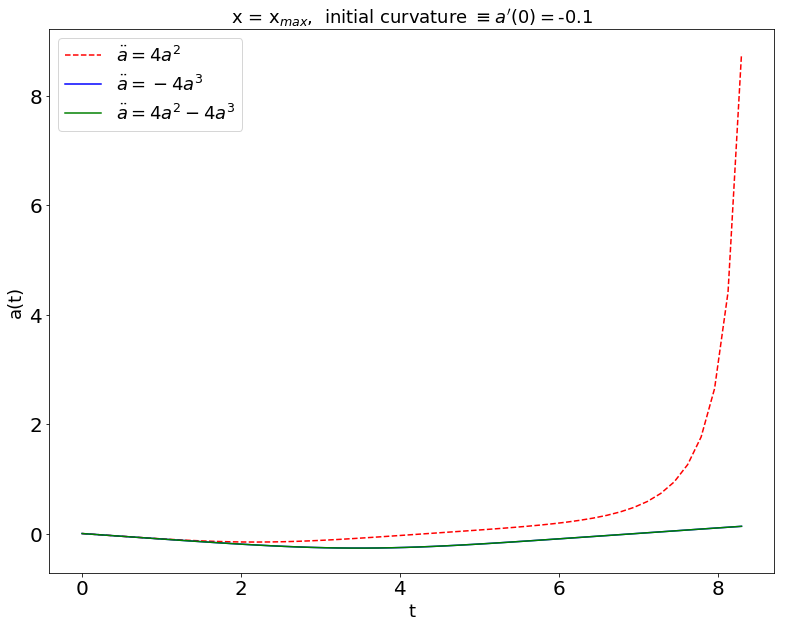

In [89]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,-0.1]

# time points
t = np.linspace(0,8.3)
t2 = np.linspace(0,8.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


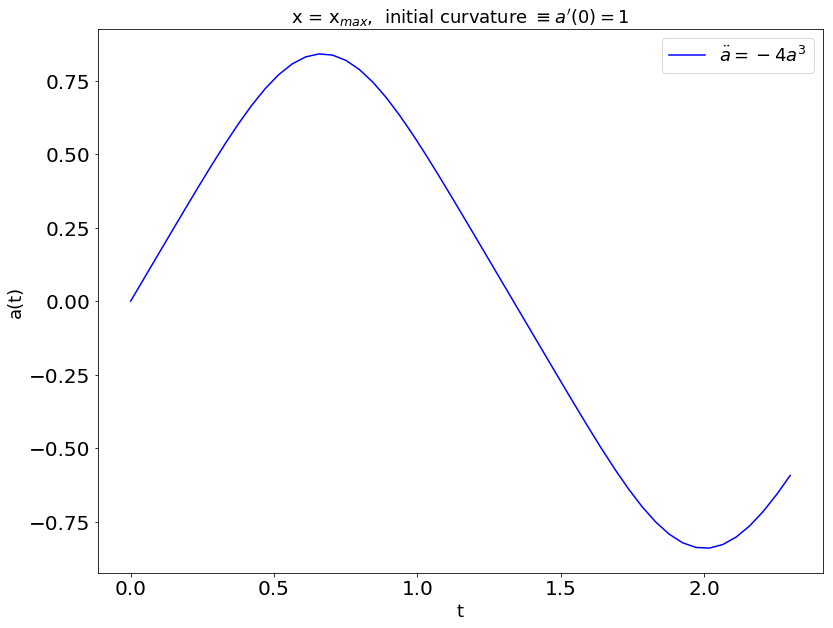

In [112]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,1]

# time points
t = np.linspace(0,3.8)
t2 = np.linspace(0,2.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
# plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# Some tests on the FFT

In [ ]:
# Some tests for the Discrete FT: simple test which is easily calculatbale by hand according to X_k = Sigma_n=0^N-1 x_n exp(-2 pi i k n )
test_data = [0,1]
FT_test = np.fft.fft(test_data)
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec = np.abs(np.fft.fft(test_data))**2 # computing the spectrum which is absolute value of Forier transformation
freqs = np.fft.fftfreq(len(FT_test)) # discrete frequencies associated to the length of the field
print("Data: ",test_data)
print(" discrete Fourier transform : ",FT_test)
print(" Frequencies: ",freqs)
print(" poswer spectrum:", spec,  )
# Very simple example which could easily be checked by hand
# Real space data
#### For illustration
# plt.figure(figsize=(8,6))
# plt.plot(test_data[:],"o",markersize = 8)
# plt.show()
# # FFTW
# plt.figure(figsize=(8,6))
# plt.plot(freqs,FT_test,"o",markersize = 8)
# plt.show()
# # Powerspectrum
# plt.figure(figsize=(8,6))
# plt.plot(np.abs(freqs),spec,"o",markersize = 8)
# plt.show()

#############################
######## Sine, 1/x example ## 
#############################

test_data2  = np.sin(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function
# test_data2  = 1./(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function

FT_test2 = np.fft.fft(test_data2) # Computing FFTW
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec2 = np.abs(np.fft.fft(test_data2))**2 # computing the spectrum which is absolute value of Forier transformation
freqs2 = np.fft.fftfreq(len(FT_test2)) # discrete frequencies associated to the length of the field
# print("Data: ",test_data2)
# print(" discrete Fourier transform : ",FT_test2)
# print(" Frequencies: ",freqs2)
# print(" poswer spectrum:", spec2,  )
# Very simple example which could easily be checked by hand
# Real space data
plt.figure(figsize=(8,6))
plt.plot(test_data2[:],".",markersize = 8)
plt.show()
# FFTW
plt.figure(figsize=(8,6))
plt.plot(freqs2,np.abs(FT_test2),".",markersize = 8)
plt.show()
# Powerspectrum
plt.figure(figsize=(8,6))
plt.plot(np.abs(freqs2),spec2,".",markersize = 8)
plt.show()

